# Python packages for working with shapefiles and tabular data

<div class="questions">  
### Questions

- How can I load shapefiles and tabular data into python?
- What are libraries and packages?
</div>

<div class="objectives">  
### Objectives

- Learn how to deal with specialty data types.
- Learn about pandas, pyshp, lasio, obspy.
</div>

## Dealing with other data types
Python can deal with basically any type of data you throw at it. The community have provided many packages that make things easy, today we will look at the "pyshp" (for dealing with shapefiles) and "pandas" (great for tables and time series) packages.

Data for this exercised was downloaded from http://www.bom.gov.au/water/groundwater/explorer/map.shtml

### Shapefiles
Shapefiles are a very common file format for GIS data.

## Dealing with other data types
Python can deal with basically any type of data you throw at it. The community have provided many packages that make things easy, today we will look at the "pyshp" (for dealing with shapefiles) and "pandas" (great for tables and time series) packages.

Data for this exercised was downloaded from http://www.bom.gov.au/water/groundwater/explorer/map.shtml

# Shapefiles
Shapefiles are a very common file format for GIS data.


In [1]:
#Load the required modules
import shapefile

#NOTE: Weirdly and confusingly, this package is called "pyshp" but you call it via the name "shapefile"

In [2]:
help(shapefile)
#Or check out the help pages https://github.com/GeospatialPython/pyshp

Help on module shapefile:

NAME
    shapefile

DESCRIPTION
    shapefile.py
    Provides read and write support for ESRI Shapefiles.
    author: jlawhead<at>geospatialpython.com
    version: 2.1.2
    Compatible with Python versions 2.7-3.x

CLASSES
    builtins.Exception(builtins.BaseException)
        ShapefileException
    builtins.list(builtins.object)
        ShapeRecords
        Shapes
    builtins.object
        Reader
        Shape
        ShapeRecord
        Writer
    
    class Reader(builtins.object)
     |  Reader(*args, **kwargs)
     |  
     |  Reads the three files of a shapefile as a unit or
     |  separately.  If one of the three files (.shp, .shx,
     |  .dbf) is missing no exception is thrown until you try
     |  to call a method that depends on that particular file.
     |  The .shx index file is used if available for efficiency
     |  but is not required to read the geometry from the .shp
     |  file. The "shapefile" argument in the constructor is the
     |

In [5]:
#Set the filename
boreshape='../data/shp_torrens_river/NGIS_BoreLine.shp'

#read in the file
shapeRead = shapefile.Reader(boreshape)

#And save out some of the shape file attributes
recs    = shapeRead.records()
shapes  = shapeRead.shapes()
fields  = shapeRead.fields
Nshp    = len(shapes)

In [6]:
print(Nshp) #print the Number of items in the shapefile

7635


    7635



In [7]:
fields[:]#print the fields

[('DeletionFlag', 'C', 1, 0),
 ['HydroID', 'N', 10, 0],
 ['HydroCode', 'C', 30, 0],
 ['BoreID', 'N', 10, 0],
 ['TopElev', 'F', 19, 11],
 ['BottomElev', 'F', 19, 11],
 ['HGUID', 'N', 10, 0],
 ['HGUNumber', 'N', 10, 0],
 ['NafHGUNumb', 'N', 10, 0],
 ['SHAPE_Leng', 'F', 19, 11]]





    [('DeletionFlag', 'C', 1, 0),
     ['HydroID', 'N', 10, 0],
     ['HydroCode', 'C', 30, 0],
     ['BoreID', 'N', 10, 0],
     ['TopElev', 'F', 19, 11],
     ['BottomElev', 'F', 19, 11],
     ['HGUID', 'N', 10, 0],
     ['HGUNumber', 'N', 10, 0],
     ['NafHGUNumb', 'N', 10, 0],
     ['SHAPE_Leng', 'F', 19, 11]]





In [8]:
recs[0] #print the first record, then this is a list that can be subscripted further

Record #0: [32001999, '652800645', 30027773, 6.74, -74.26, 31000043, 1042, 104005, 0.0]





    [32001999, '652800645', 30027773, 6.74, -74.26, 31000043, 1042, 104005, 0.0]





In [9]:
shapes[0].points #print the point values of the first shape

[(591975.5150000006, -3816141.8817), (591975.5150000006, -3816141.8817)]

<div class="challenge">

### Challenge. TODO

- Look at the data above. It provides the coordinates of the wells as points. 
- How many coordinates are provided for each well? Why do you think this is?

<details>
<summary>Solution</summary>

There are two coordinates. 
    
```python
```
</details>
</div>

Shapefiles are not a native python format, but the community have developed tools for exploring them. The package we have used "pyshp" imported with the name "shapefile" (for some non-consistent weird reason), is one example of working with shapefiles. Alternatives exist.

## More table manipulation

In [10]:
import pandas

In [13]:
#read in the data
log_data=pandas.read_csv("../data/shp_torrens_river/NGIS_LithologyLog.csv",\
                         header=0,sep=',',skipinitialspace=True,quotechar ='"',\
                         usecols=list(range(0,13)),\
                         skiprows=[453,456,458,460,689,697,720,723,726,839,880,884,885,890,898,934])

#This data was weird because it has quotation marks to signify inches inside comments within the file, 
#making automatic reading of it tricky

In [14]:
log_data           # print the first 30 and last 30 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata
3,1770725,30141910,662816624,4.0,NGS,0.0,6.0,4.0,-2.0,None,None,No sample,SAGeodata
4,1770726,30141910,662816624,4.0,NGS,6.0,15.0,-2.0,-11.0,CLYU,None,"Clay - orange-red grey, mottled; stiff-sticky....",SAGeodata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70152,4120345,30304039,662829228,None,UNK,9.0,10.0,None,None,CLYU,None,Sandy clay,SAGeodata
70153,4120346,30304039,662829228,None,UNK,10.0,12.5,None,None,SAND,None,Clay sand,SAGeodata
70154,4120347,30304050,652802882,None,UNK,0.0,0.3,None,None,FILL,None,Fill,SAGeodata
70155,4120348,30304050,652802882,None,UNK,0.3,0.8,None,None,SAND,None,Clayey sand,SAGeodata


In [15]:
# add a new column as a function of existing columns
log_data['Thickness'] = log_data.ToDepth - log_data.FromDepth

In [16]:
type(log_data)     # see what Python type the DataFrame is

pandas.core.frame.DataFrame

In [17]:
log_data.head(3)    # print the first 3 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata,1.5
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata,2.5
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata,2.0


In [18]:
log_data.index     # “the index” (aka “the labels”). 
#Pandas is great for using timeseries data, where the index can be the timestamps

RangeIndex(start=0, stop=70157, step=1)

In [19]:
log_data.columns   # column names (which is “an index”)

Index(['OBJECTID', 'BoreID', 'HydroCode', 'RefElev', 'RefElevDesc',
       'FromDepth', 'ToDepth', 'TopElev', 'BottomElev', 'MajorLithCode',
       'MinorLithCode', 'Description', 'Source', 'Thickness'],
      dtype='object')

In [20]:
log_data.dtypes    # data types of each column

OBJECTID           int64
BoreID             int64
HydroCode          int64
RefElev           object
RefElevDesc       object
FromDepth        float64
ToDepth          float64
TopElev           object
BottomElev        object
MajorLithCode     object
MinorLithCode     object
Description       object
Source            object
Thickness        float64
dtype: object

In [21]:
log_data.shape     # number of rows and columns

(70157, 14)

In [22]:
log_data.values    # underlying numpy array — df are stored as numpy arrays for efficiencies.

array([[1769789, 30062892, 662815923, ..., 'Clay', 'SAGeodata', 1.5],
       [1769790, 30062892, 662815923, ..., 'Rocks and sand', 'SAGeodata',
        2.5],
       [1769791, 30062892, 662815923, ..., 'Clay', 'SAGeodata', 2.0],
       ...,
       [4120347, 30304050, 652802882, ..., 'Fill', 'SAGeodata', 0.3],
       [4120348, 30304050, 652802882, ..., 'Clayey sand', 'SAGeodata',
        0.5],
       [4120349, 30304050, 652802882, ..., 'Sand', 'SAGeodata', 2.7]],
      dtype=object)

In [23]:
#log_data['MajorLithCode']         # select one column
##Equivalent to 
#log_data.MajorLithCode 
##and
#log_data.iloc[:,9]

In [24]:
type(log_data['MajorLithCode'])   # determine datatype of column (e.g., Series)

pandas.core.series.Series

In [25]:
#describe the data frame
log_data.describe(include='all')     

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
count,7.015700e+04,7.015700e+04,7.015700e+04,70157,70157,70157.000000,70157.000000,70157,70157,70157,70157,70157,70157,70157.000000
unique,NaN,NaN,NaN,5068,4,NaN,NaN,27777,27878,81,42,33598,39,NaN
top,NaN,NaN,NaN,None,NGS,NaN,NaN,None,None,CLYU,None,Clay,SAGeodata,NaN
freq,NaN,NaN,NaN,18514,44946,NaN,NaN,18514,18514,25857,62797,4603,70119,NaN
mean,2.505842e+06,3.018201e+07,6.624491e+08,NaN,NaN,24.942443,30.626594,NaN,NaN,NaN,NaN,NaN,NaN,5.684151
std,9.276598e+05,8.068098e+04,2.130462e+06,NaN,NaN,45.435866,48.609957,NaN,NaN,NaN,NaN,NaN,NaN,9.943264
min,1.769789e+06,3.002715e+07,6.528000e+08,NaN,NaN,0.000000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.932799e+06,3.014558e+07,6.628129e+08,NaN,NaN,0.800000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1.999036e+06,3.018487e+07,6.628196e+08,NaN,NaN,7.000000,11.580000,NaN,NaN,NaN,NaN,NaN,NaN,2.800000
75%,3.967159e+06,3.025487e+07,6.628248e+08,NaN,NaN,25.900000,34.750000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [26]:
# summarise a pandas Series
log_data.FromDepth.describe()   # describe a single column

count    70157.000000
mean        24.942443
std         45.435866
min          0.000000
25%          0.800000
50%          7.000000
75%         25.900000
max        610.300000
Name: FromDepth, dtype: float64

In [26]:
#calculate mean of 5th column ("FromDepth")
log_data.iloc[:,5].mean()      

24.9424428068475

In [27]:
#alternate method to calculate mean of FromDepth column (the 5th one)
log_data["FromDepth"].mean()    

24.9424428068475

In [29]:
#Count how many Lith Codes there are
lithCounts=log_data.MajorLithCode.value_counts()

In [30]:
#Print the lithcodes, use .index or .values 
lithCounts

CLYU    25857
SAND    12772
SLAT     4069
FILL     4020
SDST     3207
        ...  
REGO        1
LMSD        1
ARKS        1
DIOR        1
DUST        1
Name: MajorLithCode, Length: 81, dtype: int64

<AxesSubplot:>

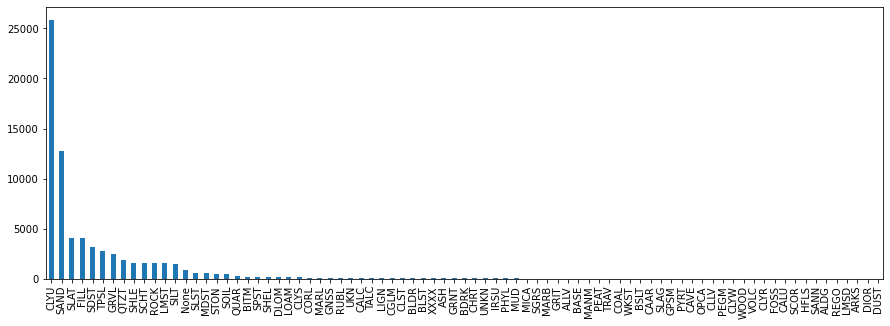

In [31]:
#plot a bar chart of the lith codes
lithCounts.plot.bar(rot=90,figsize=(15,5))

<AxesSubplot:>

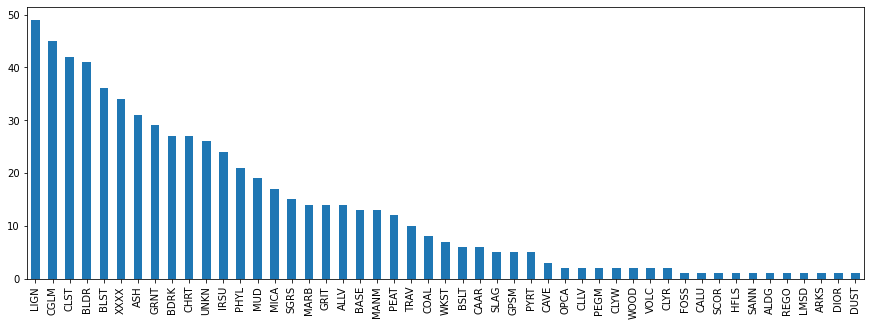

In [32]:
#Plot a bar chart of the lith codes for the rarer lithologies
lithCounts[(lithCounts < 50)].plot.bar(rot=90,figsize=(15,5))

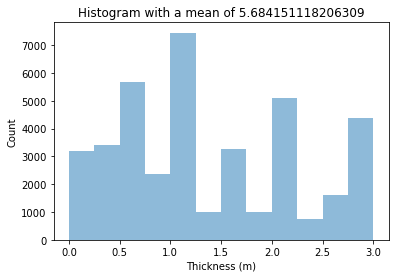

In [33]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
# example data
mu = np.mean(log_data['Thickness'].values) # mean of distribution
sigma = np.std(log_data['Thickness'].values) # standard deviation of distribution
x = log_data['Thickness'].values
# the histogram of the data
plt.hist(x, bins=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2,2.25,2.5,2.75,3.0], alpha=0.5)
plt.xlabel('Thickness (m)')
plt.ylabel('Count')
mystring="Histogram with a mean of "+ str(mu)
plt.title(mystring)
 
# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()




In [34]:
# import numpy as np
# cmap = plt.get_cmap('viridis')
# colors = cmap(np.linspace(0, 1, len(lithCounts.index)))
# colors

# for row in log_data.itertuples():
#     boreid=row[3]
#     for ind,value in enumerate(recs):  
#         try:
#             value.index(boreid)
#             print(recs)
#         except:
#             continue
#     #(row[3])



# for ind, value in enumerate(recs):
#     #Get the lat lon value
#     lon=value[18]
#     lat=value[17]
#     #Get the Lithology unit
#     value[]
    
#     #Now plot it
#     plt.plot(lon,lat,"|")

# Exercise
Go to [http://www.bom.gov.au/water/groundwater/explorer/map.shtml](http://www.bom.gov.au/water/groundwater/explorer/map.shtml) and pick another River Region. Download the dataset in "Shapefile" format (this will download the csv also). Once you have the data, follow the same routines as above and see what you can find out about the river region. 



# Log ASCII Files 

Python has some very specific packages/libraries. You can often create your own tools for doing niche tasks, but often you will find a variety of tools to make things simpler for you. We will show some simple tasks to perfrom on borehole data (in .las format) with the [lasio](https://lasio.readthedocs.io/en/latest/) library. 

This tutorial based off https://towardsdatascience.com/handling-big-volume-of-well-log-data-with-a-boosted-time-efficiency-with-python-dfe0319daf26

Original Data from:
https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/image/DDD/PEDP013LOGS.zip

Title:	Cooper Basin selected well logs in LAS format.
Publication Date:	November 20
Prepared by:	Energy Resources Division, Department of the Premier and Cabinet
This Record URL:	https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/wci/Record?r=0&m=1&w=catno=2040037




In [36]:
#For plotting
import matplotlib.pyplot as plt

#Library specifically for "well data"
import lasio

#To read files
import glob

#For "regular expression manipulation"
import re

In [38]:
#Build a list of filenames to read
read_files = glob.glob("data/WELL/*.las")
read_files

['data/WELL/BoolLagoon1.las',
 'data/WELL/Bungaloo1.las',
 'data/WELL/BeachportEast1.las',
 'data/WELL/BiscuitFlat1.las',
 'data/WELL/Balnaves.las',
 'data/WELL/Banyula.las',
 'data/WELL/Burrungule1.las',
 'data/WELL/Beachport1.las']

In [39]:
#Cut out just the name of the well from the filenames
well_names = []
for file in read_files:
    print("FILE:", file)
    well=re.split('/|.las',file)
    print("SPLIT:", well)
    well_names.append(well[3])

print("There are ", len(well_names), "wells.")
print(well_names)

FILE: data/WELL/BoolLagoon1.las
SPLIT: ['data', 'WELL', 'BoolLagoon1', '']
FILE: data/WELL/Bungaloo1.las
SPLIT: ['data', 'WELL', 'Bungaloo1', '']
FILE: data/WELL/BeachportEast1.las
SPLIT: ['data', 'WELL', 'BeachportEast1', '']
FILE: data/WELL/BiscuitFlat1.las
SPLIT: ['data', 'WELL', 'BiscuitFlat1', '']
FILE: data/WELL/Balnaves.las
SPLIT: ['data', 'WELL', 'Balnaves', '']
FILE: data/WELL/Banyula.las
SPLIT: ['data', 'WELL', 'Banyula', '']
FILE: data/WELL/Burrungule1.las
SPLIT: ['data', 'WELL', 'Burrungule1', '']
FILE: data/WELL/Beachport1.las
SPLIT: ['data', 'WELL', 'Beachport1', '']
There are  8 wells.
['', '', '', '', '', '', '', '']


In [40]:
#Read in the log files to lasio
lases = []
for files in read_files:
    las = lasio.read(files)
    lases.append(las)

In [41]:
#You can get an idea of what you can interogate using the help function
help(lases)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [42]:
#This is just a regular Python list! But the list contains
#in this case, special objects known as "LasFile(s)" or lasio.las object.
#Get some details using help again
help(lases[1])

Help on LASFile in module lasio.las object:

class LASFile(builtins.object)
 |  LASFile(file_ref=None, **read_kwargs)
 |  
 |  LAS file object.
 |  
 |  Keyword Arguments:
 |      file_ref (file-like object, str): either a filename, an open file
 |          object, or a string containing the contents of a file.
 |  
 |  See these routines for additional keyword arguments you can use when
 |  reading in a LAS file:
 |  
 |  * :func:`lasio.reader.open_with_codecs` - manage issues relate to character
 |    encodings
 |  * :meth:`lasio.LASFile.read` - control how NULL values and errors are
 |    handled during parsing
 |  
 |  Attributes:
 |      encoding (str or None): the character encoding used when reading the
 |          file in from disk
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      Provide access to curve data.
 |      
 |      Arguments:
 |          key (str, int): either a curve mnemonic or the column index.
 |      
 |      Returns:
 |          1D :class:

In [43]:
#From there we can get some info from each of the wells
j=0
for well in lases:
    #e.g. pull out the varaibles availble from the wells
    print("Wellid:", j, well_names[j])
    j+=1
    print(well.keys())

Wellid: 0 
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'SP']
Wellid: 1 
['DEPTH', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 2 
['DEPTH', 'GR', 'RDEP', 'RMED', 'SP']
Wellid: 3 
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'MINV', 'MNOR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 4 
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'MINV', 'MNOR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 5 
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'RDEP', 'RHOB', 'RMED', 'SP']
Wellid: 6 
['DEPTH', 'CALI', 'DT', 'GR', 'RDEP', 'RMED', 'SP']
Wellid: 7 
['DEPTH', 'CALI', 'MINV', 'MNOR', 'RDEP', 'RMED', 'SP']


In [44]:
#Set a wellid you want to explore more
wellid=1

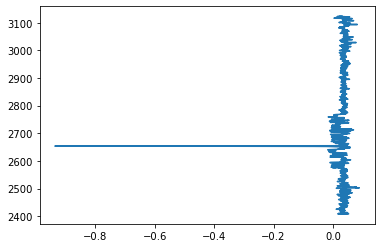

In [45]:
#Make a plot of one of the wells
plt.plot(lases[wellid]['DRHO'],lases[wellid]['DEPTH'])

TODO: What does this plot show us??? What is the conclusion?

In [46]:
#Get some more info out of the well data
print(lases[wellid].curves)

Mnemonic  Unit   Value  Description                                                                                        
--------  ----   -----  -----------                                                                                        
DEPTH     M             Depth                                                                                              
CALI      in            Caliper     CAL Spliced, Edited, bungaloo_1_mll_rtex_r1.dlis, bungaloo_1_mll_rtex_r2.dlis          
DRHO      g/cm3         DenCorr     ZCOR Edited, bungaloo_1_mll_rtex_xyzdl_r6.dlis                                         
DT        us/ft         Sonic       DT24 DT24.I Spliced, Edited, bungaloo_1_mll_rtex_r1.dlis, bungaloo_1_mll_rtex_r2.dlis  
DTS       us/ft         ShearSonic  DTS , bungaloo_1_mll_rtex_r2.dlis                                                      
GR        gAPI          GammaRay    GR Spliced, Edited, bungaloo_1_mll_rtex_r1.dlis, bungaloo_1_mll_rtex_r2.dlis           
NPHI    

Param: RHOB of well: 


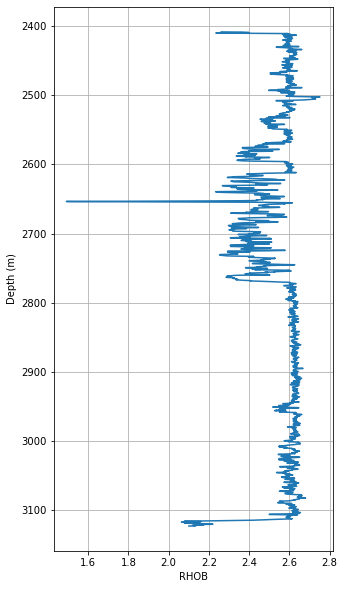

In [47]:
# Finally, make a reasonable plot
var = 'RHOB' 
print("Param:", var, "of well:", well_names[wellid])
plt.figure(figsize=(5,10))
plt.plot((lases[wellid][var]), (lases[wellid]['DEPTH']))

#And change some details on the plot
plt.xlabel(var); plt.ylabel("Depth (m)")
plt.grid(True)
plt.gca().invert_yaxis()

TODO: Why is this plot reasonable? What does it show?

# SEGY Seismic data processing

In [48]:
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
import numpy as np

#Adapted from https://agilescientific.com/blog/2016/9/21/x-lines-of-python-read-and-write-seg-y
#See the notebooks here for more good examples
#https://hub-binder.mybinder.ovh/user/agile-geoscience-xlines-n1mojurk

In [51]:
#Set the filename of the segy data

filename="data/james/james_1959_pstm_tvfk_gain.sgy"

#Title: 2006 James 3D Seismic Survey.
#Author: White, A.
#Prepared by: Terrex Seismic Pty Ltd; Pioneer Surveys Pty Ltd; WestenGeco
#Tenement: PPL00182
#Operator: Santos Ltd
#https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/wci/Record?r=0&m=1&w=catno=2035790

In [52]:
stream = _read_segy(filename, headonly=True)
stream

48832 traces in the SEG Y structure.

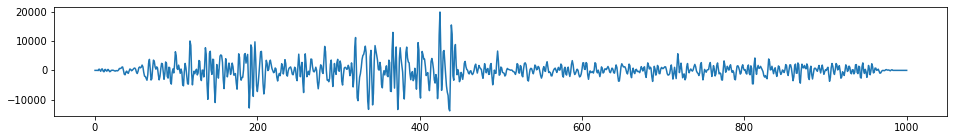

In [53]:
one_trace = stream.traces[10000]

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

In [54]:
data = np.stack(t.data for t in stream.traces[12320:12320+500])

/Users/darya/anaconda3/envs/python4pesa/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [55]:
stream.traces[10000]

Trace sequence number within line: 10001
1001 samples, dtype=float32, 250.00 Hz

In [56]:
data.shape

(500, 1001)

In [57]:
np.shape(stream.traces)

(48832,)

In [58]:
vm = np.percentile(data, 95)
print("The 95th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 95th percentile is 4365; the max amplitude is 34148


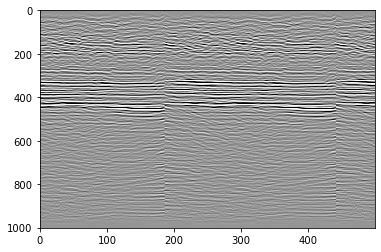

In [59]:
plt.imshow(data.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

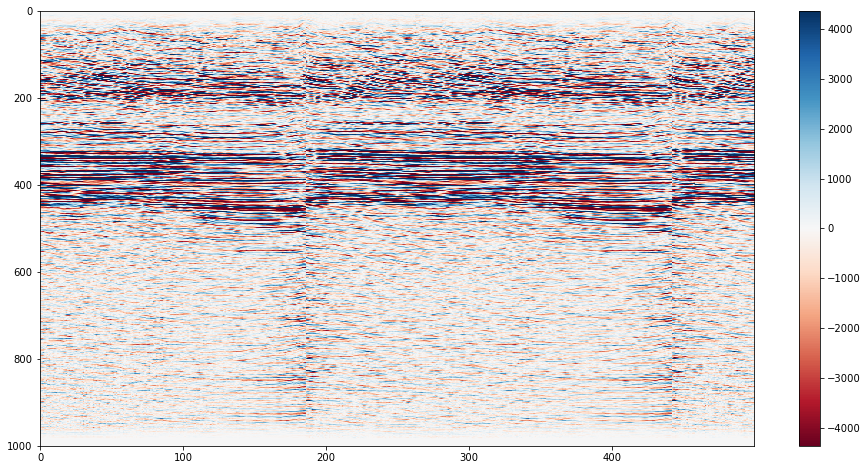

In [60]:
plt.figure(figsize=(16,8))
plt.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.colorbar()
plt.show()

In [61]:
print(stream.textual_file_header.decode())

C 1 CLIENT SANTOS                 COMPANY                       CREW NO         C 2 LINE    2000.00 AREA JAMES3D                                                C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER                  C 4 INSTRUMENT  MFG            MODEL            SERIAL NO                       C 5 DATA TRACES/RECORD 24569  AUXILIARY TRACES/RECORD       0 CDP FOLD    40    C 6 SAMPLE INTERVAL  4.00   SAMPLES/TRACE  1001 BITS/IN      BYTES/SAMPLE  4    C 7 RECORDING FORMAT        FORMAT THIS REEL SEG-Y  MEASUREMENT SYSTEM METERS   C 8 SAMPLE CODE FLOATING PT                                                     C09 JAMES 3D                                                                    C10 WESTERNGECO                                                                 C11 MARCH 2007                                                                  C12 VERSION : James3D_pstm_tvfk_gain                                            C13 FILTERED TRIM PSTM STACK            

In [62]:
print(stream.traces[50].header)

trace_sequence_number_within_line: 51
trace_sequence_number_within_segy_file: 51
original_field_record_number: 2000
trace_number_within_the_original_field_record: 1
energy_source_point_number: 10055
ensemble_number: 10055
trace_number_within_the_ensemble: 51
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 1
number_of_horizontally_stacked_traces_yielding_this_trace: 24
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 482680
source_coordinate_y: 7035256
group_coordinate_x: 482680
group_coordinate_y: 7035256
coordinate_units: 1
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_sour

In [63]:
dt = stream.traces[0].header.sample_interval_in_ms_for_this_trace / 1e6
dt

0.004

<div class="challenge">

### Challenge. TODO

- This needs a HW challenge!

<details>
<summary>Solution</summary>

...    
```python
```

<div class="keypoints">
### Key points
    
- Shapefiles
- Pandas dataframes
</div>






    0.004
